- Open the small file and prepare the data for creating shingles
- n-gram = 4

In [137]:
import pandas as pd
import re
import time
import binascii

In [138]:
small_dataset = 'data/news_articles_small.csv'
df_small_dataset = pd.read_csv(small_dataset)

In [139]:
df_small_dataset.head()

News_ID                                            article
0        0  russian foreign minister sergei kozyliev arriv...
1        1  ''''' one one', and , the one theer , it was. ...
2        2  The threat of an opposition boycott and a smal...
3        3  The Bank of France increased its short-term in...
4        4  british foreign secretary douglas hurd said th...

In [140]:
#Pre-process data
#Convert to lowercase.
df_small_dataset['article'] = df_small_dataset['article'].str.lower()

#Remove punctuation
p = re.compile(r'[^\w\s]+')
df_small_dataset['article'] = [p.sub('', x) for x in df_small_dataset['article'].tolist()]


In [141]:
#Split each document in a list of words
small_dataset_split = []
for idx, row in df_small_dataset.iterrows():
    small_dataset_split.append(row[1].split())

df_small_dataset['splitted'] = small_dataset_split

In [144]:
#Add shingles with ngram 4
#Source: https://github.com/chrisjmccormick/MinHash/blob/master/runMinHashExample.py
shingleID = 0

shingledDocs = {}
docIds = []

t0 = time.time()

totalShingles = 0

for idx, row in df_small_dataset.iterrows():
    shingles = set()
    for i in range(0, len(row[2]) - 3):
        shingle = row[2][i]+ " " + row[2][i + 1] + " " + row[2][i + 2] + " " + row[2][i + 3]
        crc =  binascii.crc32(bytes(shingle, 'utf-8')) & 0xffffffff
            # may be replaces by a fingerprint function 
        shingles.add(crc)
        
    shingledDocs[row[0]]= shingles
    docIds.append(row[0])
    totalShingles = totalShingles + (len(row[2]) - 3)

t1 = time.time()
print('Time spent: ', t1-t0)

Time spent:  23.920265197753906


In [147]:
print("Generating random hash functions...")
# Number of hash functions
M = 5
random_values = random_list(5)

signatures = []

Generating random hash functions...
[2454155475, 139951793, 1842064464, 2072586604, 2482883256]


In [149]:
for doc in docIds:
    signature = []
#     print(shingledDocs[doc])
    for hash_fun in range(hash_functions):
        min_value = 1e11
        random_value = random_values[hash_fun]
        print("random_value ", random_value)
        for shingle in shingledDocs[doc]:
            hash_value = random_hash(shingle, random_value)
#             print("shingle", shingle)
#             print("h_value ", hash_value)
            if hash_value < min_value:
                min_value = hash_value
        signature.append(min_value)
        print(min_value, " hash number: ", hash_fun, " sign", signature)
    signatures.append(signature)
    print(signatures)
    
#     for i in range(hash_functions):

random_value  2454155475
67  hash number:  0  sign [67]
random_value  139951793
74240  hash number:  1  sign [67, 74240]
random_value  1842064464
66576  hash number:  2  sign [67, 74240, 66576]
random_value  2072586604
65548  hash number:  3  sign [67, 74240, 66576, 65548]
random_value  2482883256
1376792  hash number:  4  sign [67, 74240, 66576, 65548, 1376792]
[[67, 74240, 66576, 65548, 1376792]]
random_value  2454155475
94419  hash number:  0  sign [94419]
random_value  139951793
4112  hash number:  1  sign [94419, 4112]
random_value  1842064464
524304  hash number:  2  sign [94419, 4112, 524304]
random_value  2072586604
16785408  hash number:  3  sign [94419, 4112, 524304, 16785408]
random_value  2482883256
117432  hash number:  4  sign [94419, 4112, 524304, 16785408, 117432]
[[67, 74240, 66576, 65548, 1376792], [94419, 4112, 524304, 16785408, 117432]]
random_value  2454155475
65666  hash number:  0  sign [65666]
random_value  139951793
5120  hash number:  1  sign [65666, 5120]
ran

random_value  1842064464
13282384  hash number:  2  sign [86096, 640, 13282384]
random_value  2072586604
17301604  hash number:  3  sign [86096, 640, 13282384, 17301604]
random_value  2482883256
4573696  hash number:  4  sign [86096, 640, 13282384, 17301604, 4573696]
[[67, 74240, 66576, 65548, 1376792], [94419, 4112, 524304, 16785408, 117432], [65666, 5120, 625744, 524588, 590472], [28882, 9392, 166928, 75884, 84496], [19, 16400, 9013264, 25241856, 524312], [69761, 4224, 206928, 76104, 1869832], [82, 5808, 43008, 65612, 591880], [4227, 6176, 43024, 8923468, 1097904], [4225, 3233, 0, 8192, 2176], [4304, 4784, 730128, 2148, 1837200], [12353, 1040, 9296, 8268, 2097152], [16, 1584, 526336, 10592, 100920], [12371, 4113, 535568, 10304, 82576], [131, 13440, 238672, 598340, 32904], [2, 21680, 8620096, 10596, 1329184], [65600, 18064, 231440, 67616, 1166000], [65665, 3233, 204800, 76040, 3459232], [130, 15489, 558080, 600356, 116792], [0, 6673, 142336, 264, 311952], [4160, 33, 526416, 8204, 3532

24706  hash number:  0  sign [24706]
random_value  139951793
12849  hash number:  1  sign [24706, 12849]
random_value  1842064464
34880  hash number:  2  sign [24706, 12849, 34880]
random_value  2072586604
2056  hash number:  3  sign [24706, 12849, 34880, 2056]
random_value  2482883256
1146888  hash number:  4  sign [24706, 12849, 34880, 2056, 1146888]
[[67, 74240, 66576, 65548, 1376792], [94419, 4112, 524304, 16785408, 117432], [65666, 5120, 625744, 524588, 590472], [28882, 9392, 166928, 75884, 84496], [19, 16400, 9013264, 25241856, 524312], [69761, 4224, 206928, 76104, 1869832], [82, 5808, 43008, 65612, 591880], [4227, 6176, 43024, 8923468, 1097904], [4225, 3233, 0, 8192, 2176], [4304, 4784, 730128, 2148, 1837200], [12353, 1040, 9296, 8268, 2097152], [16, 1584, 526336, 10592, 100920], [12371, 4113, 535568, 10304, 82576], [131, 13440, 238672, 598340, 32904], [2, 21680, 8620096, 10596, 1329184], [65600, 18064, 231440, 67616, 1166000], [65665, 3233, 204800, 76040, 3459232], [130, 15489,

639616  hash number:  4  sign [82, 128, 35920, 2124, 639616]
[[67, 74240, 66576, 65548, 1376792], [94419, 4112, 524304, 16785408, 117432], [65666, 5120, 625744, 524588, 590472], [28882, 9392, 166928, 75884, 84496], [19, 16400, 9013264, 25241856, 524312], [69761, 4224, 206928, 76104, 1869832], [82, 5808, 43008, 65612, 591880], [4227, 6176, 43024, 8923468, 1097904], [4225, 3233, 0, 8192, 2176], [4304, 4784, 730128, 2148, 1837200], [12353, 1040, 9296, 8268, 2097152], [16, 1584, 526336, 10592, 100920], [12371, 4113, 535568, 10304, 82576], [131, 13440, 238672, 598340, 32904], [2, 21680, 8620096, 10596, 1329184], [65600, 18064, 231440, 67616, 1166000], [65665, 3233, 204800, 76040, 3459232], [130, 15489, 558080, 600356, 116792], [0, 6673, 142336, 264, 311952], [4160, 33, 526416, 8204, 35328], [4306, 96800, 197712, 8396872, 803472], [73938, 640, 4366352, 75840, 49800], [144, 15888, 532480, 67596, 835616], [20481, 17025, 132096, 8454436, 2179256], [90195, 90129, 4859968, 74020, 328240], [4098, 

526656  hash number:  3  sign [1, 1024, 131088, 526656]
random_value  2482883256
49336  hash number:  4  sign [1, 1024, 131088, 526656, 49336]
[[67, 74240, 66576, 65548, 1376792], [94419, 4112, 524304, 16785408, 117432], [65666, 5120, 625744, 524588, 590472], [28882, 9392, 166928, 75884, 84496], [19, 16400, 9013264, 25241856, 524312], [69761, 4224, 206928, 76104, 1869832], [82, 5808, 43008, 65612, 591880], [4227, 6176, 43024, 8923468, 1097904], [4225, 3233, 0, 8192, 2176], [4304, 4784, 730128, 2148, 1837200], [12353, 1040, 9296, 8268, 2097152], [16, 1584, 526336, 10592, 100920], [12371, 4113, 535568, 10304, 82576], [131, 13440, 238672, 598340, 32904], [2, 21680, 8620096, 10596, 1329184], [65600, 18064, 231440, 67616, 1166000], [65665, 3233, 204800, 76040, 3459232], [130, 15489, 558080, 600356, 116792], [0, 6673, 142336, 264, 311952], [4160, 33, 526416, 8204, 35328], [4306, 96800, 197712, 8396872, 803472], [73938, 640, 4366352, 75840, 49800], [144, 15888, 532480, 67596, 835616], [20481,

8462352  hash number:  2  sign [69827, 12817, 8462352]
random_value  2072586604
65568  hash number:  3  sign [69827, 12817, 8462352, 65568]
random_value  2482883256
51360  hash number:  4  sign [69827, 12817, 8462352, 65568, 51360]
[[67, 74240, 66576, 65548, 1376792], [94419, 4112, 524304, 16785408, 117432], [65666, 5120, 625744, 524588, 590472], [28882, 9392, 166928, 75884, 84496], [19, 16400, 9013264, 25241856, 524312], [69761, 4224, 206928, 76104, 1869832], [82, 5808, 43008, 65612, 591880], [4227, 6176, 43024, 8923468, 1097904], [4225, 3233, 0, 8192, 2176], [4304, 4784, 730128, 2148, 1837200], [12353, 1040, 9296, 8268, 2097152], [16, 1584, 526336, 10592, 100920], [12371, 4113, 535568, 10304, 82576], [131, 13440, 238672, 598340, 32904], [2, 21680, 8620096, 10596, 1329184], [65600, 18064, 231440, 67616, 1166000], [65665, 3233, 204800, 76040, 3459232], [130, 15489, 558080, 600356, 116792], [0, 6673, 142336, 264, 311952], [4160, 33, 526416, 8204, 35328], [4306, 96800, 197712, 8396872, 8

random_value  139951793
1168  hash number:  1  sign [86099, 1168]
random_value  1842064464
730128  hash number:  2  sign [86099, 1168, 730128]
random_value  2072586604
534568  hash number:  3  sign [86099, 1168, 730128, 534568]
random_value  2482883256
4734992  hash number:  4  sign [86099, 1168, 730128, 534568, 4734992]
[[67, 74240, 66576, 65548, 1376792], [94419, 4112, 524304, 16785408, 117432], [65666, 5120, 625744, 524588, 590472], [28882, 9392, 166928, 75884, 84496], [19, 16400, 9013264, 25241856, 524312], [69761, 4224, 206928, 76104, 1869832], [82, 5808, 43008, 65612, 591880], [4227, 6176, 43024, 8923468, 1097904], [4225, 3233, 0, 8192, 2176], [4304, 4784, 730128, 2148, 1837200], [12353, 1040, 9296, 8268, 2097152], [16, 1584, 526336, 10592, 100920], [12371, 4113, 535568, 10304, 82576], [131, 13440, 238672, 598340, 32904], [2, 21680, 8620096, 10596, 1329184], [65600, 18064, 231440, 67616, 1166000], [65665, 3233, 204800, 76040, 3459232], [130, 15489, 558080, 600356, 116792], [0, 66

[[67, 74240, 66576, 65548, 1376792], [94419, 4112, 524304, 16785408, 117432], [65666, 5120, 625744, 524588, 590472], [28882, 9392, 166928, 75884, 84496], [19, 16400, 9013264, 25241856, 524312], [69761, 4224, 206928, 76104, 1869832], [82, 5808, 43008, 65612, 591880], [4227, 6176, 43024, 8923468, 1097904], [4225, 3233, 0, 8192, 2176], [4304, 4784, 730128, 2148, 1837200], [12353, 1040, 9296, 8268, 2097152], [16, 1584, 526336, 10592, 100920], [12371, 4113, 535568, 10304, 82576], [131, 13440, 238672, 598340, 32904], [2, 21680, 8620096, 10596, 1329184], [65600, 18064, 231440, 67616, 1166000], [65665, 3233, 204800, 76040, 3459232], [130, 15489, 558080, 600356, 116792], [0, 6673, 142336, 264, 311952], [4160, 33, 526416, 8204, 35328], [4306, 96800, 197712, 8396872, 803472], [73938, 640, 4366352, 75840, 49800], [144, 15888, 532480, 67596, 835616], [20481, 17025, 132096, 8454436, 2179256], [90195, 90129, 4859968, 74020, 328240], [4098, 3216, 140368, 526344, 1605688], [131, 3745, 10320, 10316, 344

524384  hash number:  3  sign [8194, 6161, 101376, 524384]
random_value  2482883256
623288  hash number:  4  sign [8194, 6161, 101376, 524384, 623288]
[[67, 74240, 66576, 65548, 1376792], [94419, 4112, 524304, 16785408, 117432], [65666, 5120, 625744, 524588, 590472], [28882, 9392, 166928, 75884, 84496], [19, 16400, 9013264, 25241856, 524312], [69761, 4224, 206928, 76104, 1869832], [82, 5808, 43008, 65612, 591880], [4227, 6176, 43024, 8923468, 1097904], [4225, 3233, 0, 8192, 2176], [4304, 4784, 730128, 2148, 1837200], [12353, 1040, 9296, 8268, 2097152], [16, 1584, 526336, 10592, 100920], [12371, 4113, 535568, 10304, 82576], [131, 13440, 238672, 598340, 32904], [2, 21680, 8620096, 10596, 1329184], [65600, 18064, 231440, 67616, 1166000], [65665, 3233, 204800, 76040, 3459232], [130, 15489, 558080, 600356, 116792], [0, 6673, 142336, 264, 311952], [4160, 33, 526416, 8204, 35328], [4306, 96800, 197712, 8396872, 803472], [73938, 640, 4366352, 75840, 49800], [144, 15888, 532480, 67596, 835616],

11328  hash number:  2  sign [94210, 2609, 11328]
random_value  2072586604
524320  hash number:  3  sign [94210, 2609, 11328, 524320]
random_value  2482883256
1933864  hash number:  4  sign [94210, 2609, 11328, 524320, 1933864]
[[67, 74240, 66576, 65548, 1376792], [94419, 4112, 524304, 16785408, 117432], [65666, 5120, 625744, 524588, 590472], [28882, 9392, 166928, 75884, 84496], [19, 16400, 9013264, 25241856, 524312], [69761, 4224, 206928, 76104, 1869832], [82, 5808, 43008, 65612, 591880], [4227, 6176, 43024, 8923468, 1097904], [4225, 3233, 0, 8192, 2176], [4304, 4784, 730128, 2148, 1837200], [12353, 1040, 9296, 8268, 2097152], [16, 1584, 526336, 10592, 100920], [12371, 4113, 535568, 10304, 82576], [131, 13440, 238672, 598340, 32904], [2, 21680, 8620096, 10596, 1329184], [65600, 18064, 231440, 67616, 1166000], [65665, 3233, 204800, 76040, 3459232], [130, 15489, 558080, 600356, 116792], [0, 6673, 142336, 264, 311952], [4160, 33, 526416, 8204, 35328], [4306, 96800, 197712, 8396872, 80347

2561  hash number:  1  sign [12306, 2561]
random_value  1842064464
1088  hash number:  2  sign [12306, 2561, 1088]
random_value  2072586604
352  hash number:  3  sign [12306, 2561, 1088, 352]
random_value  2482883256
1065632  hash number:  4  sign [12306, 2561, 1088, 352, 1065632]
[[67, 74240, 66576, 65548, 1376792], [94419, 4112, 524304, 16785408, 117432], [65666, 5120, 625744, 524588, 590472], [28882, 9392, 166928, 75884, 84496], [19, 16400, 9013264, 25241856, 524312], [69761, 4224, 206928, 76104, 1869832], [82, 5808, 43008, 65612, 591880], [4227, 6176, 43024, 8923468, 1097904], [4225, 3233, 0, 8192, 2176], [4304, 4784, 730128, 2148, 1837200], [12353, 1040, 9296, 8268, 2097152], [16, 1584, 526336, 10592, 100920], [12371, 4113, 535568, 10304, 82576], [131, 13440, 238672, 598340, 32904], [2, 21680, 8620096, 10596, 1329184], [65600, 18064, 231440, 67616, 1166000], [65665, 3233, 204800, 76040, 3459232], [130, 15489, 558080, 600356, 116792], [0, 6673, 142336, 264, 311952], [4160, 33, 5264

random_value  2454155475
38019216  hash number:  0  sign [38019216]
random_value  139951793
93200  hash number:  1  sign [38019216, 93200]
random_value  1842064464
29368336  hash number:  2  sign [38019216, 93200, 29368336]
random_value  2072586604
58728448  hash number:  3  sign [38019216, 93200, 29368336, 58728448]
random_value  2482883256
66322576  hash number:  4  sign [38019216, 93200, 29368336, 58728448, 66322576]
[[67, 74240, 66576, 65548, 1376792], [94419, 4112, 524304, 16785408, 117432], [65666, 5120, 625744, 524588, 590472], [28882, 9392, 166928, 75884, 84496], [19, 16400, 9013264, 25241856, 524312], [69761, 4224, 206928, 76104, 1869832], [82, 5808, 43008, 65612, 591880], [4227, 6176, 43024, 8923468, 1097904], [4225, 3233, 0, 8192, 2176], [4304, 4784, 730128, 2148, 1837200], [12353, 1040, 9296, 8268, 2097152], [16, 1584, 526336, 10592, 100920], [12371, 4113, 535568, 10304, 82576], [131, 13440, 238672, 598340, 32904], [2, 21680, 8620096, 10596, 1329184], [65600, 18064, 231440,

random_value  2482883256
884784  hash number:  4  sign [8257, 9217, 622608, 8456512, 884784]
[[67, 74240, 66576, 65548, 1376792], [94419, 4112, 524304, 16785408, 117432], [65666, 5120, 625744, 524588, 590472], [28882, 9392, 166928, 75884, 84496], [19, 16400, 9013264, 25241856, 524312], [69761, 4224, 206928, 76104, 1869832], [82, 5808, 43008, 65612, 591880], [4227, 6176, 43024, 8923468, 1097904], [4225, 3233, 0, 8192, 2176], [4304, 4784, 730128, 2148, 1837200], [12353, 1040, 9296, 8268, 2097152], [16, 1584, 526336, 10592, 100920], [12371, 4113, 535568, 10304, 82576], [131, 13440, 238672, 598340, 32904], [2, 21680, 8620096, 10596, 1329184], [65600, 18064, 231440, 67616, 1166000], [65665, 3233, 204800, 76040, 3459232], [130, 15489, 558080, 600356, 116792], [0, 6673, 142336, 264, 311952], [4160, 33, 526416, 8204, 35328], [4306, 96800, 197712, 8396872, 803472], [73938, 640, 4366352, 75840, 49800], [144, 15888, 532480, 67596, 835616], [20481, 17025, 132096, 8454436, 2179256], [90195, 90129, 

622656  hash number:  2  sign [16595, 3760, 622656]
random_value  2072586604
8388608  hash number:  3  sign [16595, 3760, 622656, 8388608]
random_value  2482883256
82088  hash number:  4  sign [16595, 3760, 622656, 8388608, 82088]
[[67, 74240, 66576, 65548, 1376792], [94419, 4112, 524304, 16785408, 117432], [65666, 5120, 625744, 524588, 590472], [28882, 9392, 166928, 75884, 84496], [19, 16400, 9013264, 25241856, 524312], [69761, 4224, 206928, 76104, 1869832], [82, 5808, 43008, 65612, 591880], [4227, 6176, 43024, 8923468, 1097904], [4225, 3233, 0, 8192, 2176], [4304, 4784, 730128, 2148, 1837200], [12353, 1040, 9296, 8268, 2097152], [16, 1584, 526336, 10592, 100920], [12371, 4113, 535568, 10304, 82576], [131, 13440, 238672, 598340, 32904], [2, 21680, 8620096, 10596, 1329184], [65600, 18064, 231440, 67616, 1166000], [65665, 3233, 204800, 76040, 3459232], [130, 15489, 558080, 600356, 116792], [0, 6673, 142336, 264, 311952], [4160, 33, 526416, 8204, 35328], [4306, 96800, 197712, 8396872, 80

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



 [12499]
random_value  139951793
12433  hash number:  1  sign [12499, 12433]
random_value  1842064464
4401152  hash number:  2  sign [12499, 12433, 4401152]
random_value  2072586604
8397124  hash number:  3  sign [12499, 12433, 4401152, 8397124]
random_value  2482883256
541200  hash number:  4  sign [12499, 12433, 4401152, 8397124, 541200]
[[67, 74240, 66576, 65548, 1376792], [94419, 4112, 524304, 16785408, 117432], [65666, 5120, 625744, 524588, 590472], [28882, 9392, 166928, 75884, 84496], [19, 16400, 9013264, 25241856, 524312], [69761, 4224, 206928, 76104, 1869832], [82, 5808, 43008, 65612, 591880], [4227, 6176, 43024, 8923468, 1097904], [4225, 3233, 0, 8192, 2176], [4304, 4784, 730128, 2148, 1837200], [12353, 1040, 9296, 8268, 2097152], [16, 1584, 526336, 10592, 100920], [12371, 4113, 535568, 10304, 82576], [131, 13440, 238672, 598340, 32904], [2, 21680, 8620096, 10596, 1329184], [65600, 18064, 231440, 67616, 1166000], [65665, 3233, 204800, 76040, 3459232], [130, 15489, 558080, 6003

67744  hash number:  4  sign [73858, 5665, 720896, 589888, 67744]
[[67, 74240, 66576, 65548, 1376792], [94419, 4112, 524304, 16785408, 117432], [65666, 5120, 625744, 524588, 590472], [28882, 9392, 166928, 75884, 84496], [19, 16400, 9013264, 25241856, 524312], [69761, 4224, 206928, 76104, 1869832], [82, 5808, 43008, 65612, 591880], [4227, 6176, 43024, 8923468, 1097904], [4225, 3233, 0, 8192, 2176], [4304, 4784, 730128, 2148, 1837200], [12353, 1040, 9296, 8268, 2097152], [16, 1584, 526336, 10592, 100920], [12371, 4113, 535568, 10304, 82576], [131, 13440, 238672, 598340, 32904], [2, 21680, 8620096, 10596, 1329184], [65600, 18064, 231440, 67616, 1166000], [65665, 3233, 204800, 76040, 3459232], [130, 15489, 558080, 600356, 116792], [0, 6673, 142336, 264, 311952], [4160, 33, 526416, 8204, 35328], [4306, 96800, 197712, 8396872, 803472], [73938, 640, 4366352, 75840, 49800], [144, 15888, 532480, 67596, 835616], [20481, 17025, 132096, 8454436, 2179256], [90195, 90129, 4859968, 74020, 328240], [4

590176  hash number:  3  sign [200723, 19969, 698448, 590176]
random_value  2482883256
262840  hash number:  4  sign [200723, 19969, 698448, 590176, 262840]
[[67, 74240, 66576, 65548, 1376792], [94419, 4112, 524304, 16785408, 117432], [65666, 5120, 625744, 524588, 590472], [28882, 9392, 166928, 75884, 84496], [19, 16400, 9013264, 25241856, 524312], [69761, 4224, 206928, 76104, 1869832], [82, 5808, 43008, 65612, 591880], [4227, 6176, 43024, 8923468, 1097904], [4225, 3233, 0, 8192, 2176], [4304, 4784, 730128, 2148, 1837200], [12353, 1040, 9296, 8268, 2097152], [16, 1584, 526336, 10592, 100920], [12371, 4113, 535568, 10304, 82576], [131, 13440, 238672, 598340, 32904], [2, 21680, 8620096, 10596, 1329184], [65600, 18064, 231440, 67616, 1166000], [65665, 3233, 204800, 76040, 3459232], [130, 15489, 558080, 600356, 116792], [0, 6673, 142336, 264, 311952], [4160, 33, 526416, 8204, 35328], [4306, 96800, 197712, 8396872, 803472], [73938, 640, 4366352, 75840, 49800], [144, 15888, 532480, 67596, 83

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



[147, 11297, 4819984]
random_value  2072586604
67684  hash number:  3  sign [147, 11297, 4819984, 67684]
random_value  2482883256
2130432  hash number:  4  sign [147, 11297, 4819984, 67684, 2130432]
[[67, 74240, 66576, 65548, 1376792], [94419, 4112, 524304, 16785408, 117432], [65666, 5120, 625744, 524588, 590472], [28882, 9392, 166928, 75884, 84496], [19, 16400, 9013264, 25241856, 524312], [69761, 4224, 206928, 76104, 1869832], [82, 5808, 43008, 65612, 591880], [4227, 6176, 43024, 8923468, 1097904], [4225, 3233, 0, 8192, 2176], [4304, 4784, 730128, 2148, 1837200], [12353, 1040, 9296, 8268, 2097152], [16, 1584, 526336, 10592, 100920], [12371, 4113, 535568, 10304, 82576], [131, 13440, 238672, 598340, 32904], [2, 21680, 8620096, 10596, 1329184], [65600, 18064, 231440, 67616, 1166000], [65665, 3233, 204800, 76040, 3459232], [130, 15489, 558080, 600356, 116792], [0, 6673, 142336, 264, 311952], [4160, 33, 526416, 8204, 35328], [4306, 96800, 197712, 8396872, 803472], [73938, 640, 4366352, 758

2560  hash number:  1  sign [16531, 2560]
random_value  1842064464
166976  hash number:  2  sign [16531, 2560, 166976]
random_value  2072586604
2368  hash number:  3  sign [16531, 2560, 166976, 2368]
random_value  2482883256
622616  hash number:  4  sign [16531, 2560, 166976, 2368, 622616]
[[67, 74240, 66576, 65548, 1376792], [94419, 4112, 524304, 16785408, 117432], [65666, 5120, 625744, 524588, 590472], [28882, 9392, 166928, 75884, 84496], [19, 16400, 9013264, 25241856, 524312], [69761, 4224, 206928, 76104, 1869832], [82, 5808, 43008, 65612, 591880], [4227, 6176, 43024, 8923468, 1097904], [4225, 3233, 0, 8192, 2176], [4304, 4784, 730128, 2148, 1837200], [12353, 1040, 9296, 8268, 2097152], [16, 1584, 526336, 10592, 100920], [12371, 4113, 535568, 10304, 82576], [131, 13440, 238672, 598340, 32904], [2, 21680, 8620096, 10596, 1329184], [65600, 18064, 231440, 67616, 1166000], [65665, 3233, 204800, 76040, 3459232], [130, 15489, 558080, 600356, 116792], [0, 6673, 142336, 264, 311952], [4160,

65  hash number:  0  sign [65]
random_value  139951793
4784  hash number:  1  sign [65, 4784]
random_value  1842064464
207952  hash number:  2  sign [65, 4784, 207952]
random_value  2072586604
8192  hash number:  3  sign [65, 4784, 207952, 8192]
random_value  2482883256
1359920  hash number:  4  sign [65, 4784, 207952, 8192, 1359920]
[[67, 74240, 66576, 65548, 1376792], [94419, 4112, 524304, 16785408, 117432], [65666, 5120, 625744, 524588, 590472], [28882, 9392, 166928, 75884, 84496], [19, 16400, 9013264, 25241856, 524312], [69761, 4224, 206928, 76104, 1869832], [82, 5808, 43008, 65612, 591880], [4227, 6176, 43024, 8923468, 1097904], [4225, 3233, 0, 8192, 2176], [4304, 4784, 730128, 2148, 1837200], [12353, 1040, 9296, 8268, 2097152], [16, 1584, 526336, 10592, 100920], [12371, 4113, 535568, 10304, 82576], [131, 13440, 238672, 598340, 32904], [2, 21680, 8620096, 10596, 1329184], [65600, 18064, 231440, 67616, 1166000], [65665, 3233, 204800, 76040, 3459232], [130, 15489, 558080, 600356, 11

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [136]:
signatures

[[67, 74240, 66576, 65548, 1376792],
 [94419, 4112, 524304, 16785408, 117432],
 [65666, 5120, 625744, 524588, 590472],
 [28882, 9392, 166928, 75884, 84496],
 [19, 16400, 9013264, 25241856, 524312],
 [69761, 4224, 206928, 76104, 1869832],
 [82, 5808, 43008, 65612, 591880],
 [4227, 6176, 43024, 8923468, 1097904],
 [4225, 3233, 0, 8192, 2176],
 [4304, 4784, 730128, 2148, 1837200]]

In [133]:
def random_hash(value, rand_value):
#     return int.from_bytes(hashlib.md5(str(value).encode()).digest(), "big")
    return binascii.crc32(value.to_bytes(32, "little")) & rand_value

In [96]:
def random_list(n, seed=10):
    random.seed(10)
    l = []
    for i in range(n):
        r = random.getrandbits(32)
        l.append(r)
    return l

In [7]:
def jaccard(list1, list2):
    intersection = len(list(set(list1).intersection(list2)))
    union = (len(list1) + len(list2)) - intersection
    return float(intersection) / union

In [48]:
#Calculate Jaccard similarities
t0 = time.time()

JSim = {}
JSim_list = []

for i in range(0, len(docIds)):
# Print progress every 100 documents.
    if (i % 100) == 0:
        print(str(i) + " / " + str(len(docIds)))

    s1 = shingledDocs[docIds[i]]
    JSim[docIds[i]]= {}
    JSim[docIds[i]]['Doc 2']  = []
    JSim[docIds[i]]['JSim'] = []
    for j in range(i + 1, len(docIds)):
        # Retrieve the set of shingles for document j.
        s2 = shingledDocs[docIds[j]]
        JSim[docIds[i]]['Doc 2'] = docIds[i]
        # Calculate and store the actual Jaccard similarity.
        # similarity = len(s1.intersection(s2)) / len(s1.union(s2))
        similarity = jaccard(s1, s2)
        JSim_list.append(similarity)
        JSim[docIds[i]]['JSim'].append(similarity)

t1= time.time()
print('Time: ', t1-t0)

0 / 1000
100 / 1000
200 / 1000
300 / 1000
400 / 1000
500 / 1000
600 / 1000
700 / 1000
800 / 1000
900 / 1000
Time:  7.503566741943359


In [49]:
count_grouped = [0,0,0,0,0,0,0,0,0,0]
for i in JSim_list:
    if i > 0.0 and i <= 0.1:
        count_grouped[0] += 1
    if i > 0.1 and i <= 0.2:
        count_grouped[1] += 1
    if i > 0.2 and i <= 0.3:
        count_grouped[2] += 1
    if i > 0.3 and i <= 0.4:
        count_grouped[3] += 1
    if i > 0.4 and i <= 0.5:
        count_grouped[4] += 1
    if i > 0.5 and i <= 0.6:
        count_grouped[5] += 1
    if i > 0.6 and i <= 0.7:
        count_grouped[6] += 1
    if i > 0.7 and i <= 0.8:
        count_grouped[7] += 1
    if i > 0.8 and i <= 0.9:
        count_grouped[8] += 1
    if i > 0.9 and i <= 1.0:
        count_grouped[9] += 1

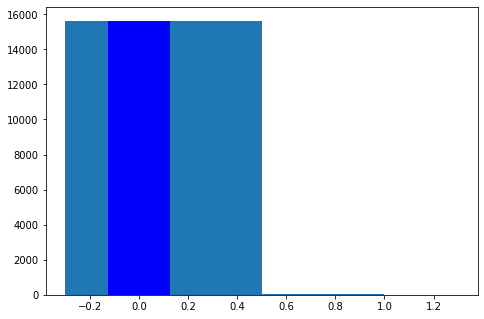

In [45]:
#source: https://www.tutorialspoint.com/matplotlib/matplotlib_bar_plot.htm
import matplotlib.pyplot as plt
left = [1, 2, 3, 4, 5,6,7,8,9,10]

x_label = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]

plt.bar(left, count_grouped, tick_label = x_label,
            width = 0.8, color = ['red', 'yellow', 'green', 'blue', 'cyan', 'red', 'yellow', 'green', 'blue', 'cyan'])

plt.xlabel('Similarity score', fontsize=20)
plt.ylabel('Documents', fontsize=20)

Text(0, 0.5, 'Documents')

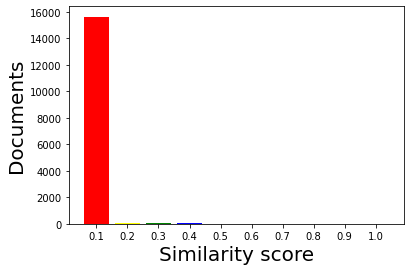